In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# boston = datasets.load_boston()
# X = boston['data']
# y = boston['target']
# feature_names = boston['feature_names']

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [3]:
#print(feature_names)
print(X)
print(y)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

Главным параметром любого метрического алгоритма является функция расстояния (или метрика), используемая для измерения сходства между объектами. Можно использовать стандартный вариант (например, евклидову метрику), но гораздо более эффективным вариантом является подбор метрики под конкретную задачу. Один из подходов — использование той же евклидовой метрики, но с весами: каждой координате ставится в соответствие определенный коэффициент; чем он больше, тем выше вклад признака в итоговое расстояние. Веса настраиваются с целью оптимизации качества на отложенной выборке. Другой подход, о котором и пойдет речь в данном задании — выбор метрики из некоторого класса метрик. Мы возьмем за основу метрику Минковского:

Параметром метрики Минковского является число p, которое мы и будем настраивать.
Реализация в sklearn

Нам понадобится решать задачу регрессии с помощью метода k ближайших соседей — воспользуйтесь для этого классом sklearn.neighbors.KNeighborsRegressor. Метрика задается с помощью параметра metric, нас будет интересовать значение ’minkowski’. Параметр метрики Минковского задается с помощью параметра p данного класса.
Инструкция по выполнению

Мы будем использовать в данном задании набор данных Boston, где нужно предсказать стоимость жилья на основе различных характеристик расположения (загрязненность воздуха, близость к дорогам и т.д.). Подробнее о признаках можно почитать по адресу https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

    Загрузите выборку Boston с помощью функции sklearn.datasets.load_boston(). Результатом вызова данной функции является объект, у которого признаки записаны в поле data, а целевой вектор — в поле target.

    Приведите признаки в выборке к одному масштабу при помощи функции sklearn.preprocessing.scale.

    Переберите разные варианты параметра метрики p по сетке от 1 до 10 с таким шагом, чтобы всего было протестировано 200 вариантов (используйте функцию numpy.linspace). Используйте KNeighborsRegressor с n_neighbors=5 и weights='distance' — данный параметр добавляет в алгоритм веса, зависящие от расстояния до ближайших соседей. В качестве метрики качества используйте среднеквадратичную ошибку (параметр scoring='mean_squared_error' у cross_val_score; при использовании библиотеки scikit-learn версии 0.18.1 и выше необходимо указывать scoring='neg_mean_squared_error').  Качество оценивайте, как и в предыдущем задании, с помощью кросс-валидации по 5 блокам с random_state = 42, не забудьте включить перемешивание выборки (shuffle=True).

    Определите, при каком p качество на кросс-валидации оказалось оптимальным. Обратите внимание, что cross_val_score возвращает массив показателей качества по блокам; необходимо максимизировать среднее этих показателей. Это значение параметра и будет ответом на задачу.

Если ответом является нецелое число, то целую и дробную часть необходимо разграничивать точкой, например, 0.4. При необходимости округляйте дробную часть до одного знака.

In [8]:
n = np.linspace(1, 10, 200)
print(n)

[ 1.          1.04522613  1.09045226  1.13567839  1.18090452  1.22613065
  1.27135678  1.31658291  1.36180905  1.40703518  1.45226131  1.49748744
  1.54271357  1.5879397   1.63316583  1.67839196  1.72361809  1.76884422
  1.81407035  1.85929648  1.90452261  1.94974874  1.99497487  2.04020101
  2.08542714  2.13065327  2.1758794   2.22110553  2.26633166  2.31155779
  2.35678392  2.40201005  2.44723618  2.49246231  2.53768844  2.58291457
  2.6281407   2.67336683  2.71859296  2.7638191   2.80904523  2.85427136
  2.89949749  2.94472362  2.98994975  3.03517588  3.08040201  3.12562814
  3.17085427  3.2160804   3.26130653  3.30653266  3.35175879  3.39698492
  3.44221106  3.48743719  3.53266332  3.57788945  3.62311558  3.66834171
  3.71356784  3.75879397  3.8040201   3.84924623  3.89447236  3.93969849
  3.98492462  4.03015075  4.07537688  4.12060302  4.16582915  4.21105528
  4.25628141  4.30150754  4.34673367  4.3919598   4.43718593  4.48241206
  4.52763819  4.57286432  4.61809045  4.66331658  4

In [17]:
KNeighborsRegressor?

In [4]:
X_tr = scale(X)

In [5]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [6]:
import sklearn
sklearn.__version__

'0.24.1'

In [18]:
cross_val_score?

cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)

In [9]:
d1 = []
for p in n:
    neigh = KNeighborsRegressor(n_neighbors=5, weights='distance', p=p, metric='minkowski')
    neigh.fit(X_tr, y)
    #print(neigh.predict(X_tr))
    sc = cross_val_score(estimator=neigh, X=X_tr, y=y, scoring='neg_mean_squared_error', cv=kf).mean()
    d1.append([p, sc])
    #print('p = %d - score = %f' % (p, sc))

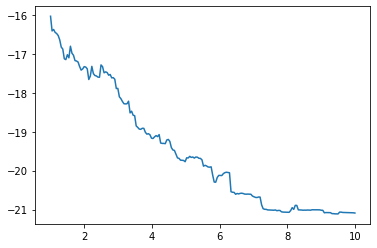

In [10]:
d1 = np.array(d1)
plt.plot(d1[:,0], d1[:,1])

In [11]:
d1[:,1].argmax()

0

In [12]:
answer = f'{round(d1[d1[:,1].argmax(), 0], 1)}'
print(answer)
with open('lab4.txt', 'w') as outfile:
    outfile.write(answer)

1.0
